In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [5]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_encoded = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [7]:
def build_model(activation_func):
    model = Sequential([
        Dense(8, activation=activation_func, input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [9]:
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for act in activations:
    print(f"\nTraining model with {act} activation")
    model = build_model(act)
    history = model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)
    histories[act] = history.history['loss']



Training model with relu activation


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training model with sigmoid activation

Training model with tanh activation


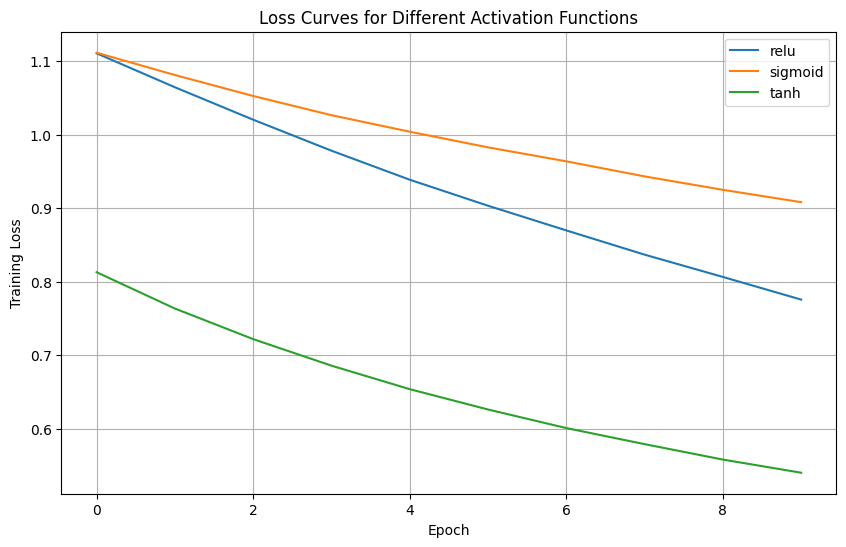

In [11]:
plt.figure(figsize=(10, 6))
for act in activations:
    plt.plot(histories[act], label=f'{act}')
    
plt.title('Loss Curves for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
for act in activations:
    model = build_model(act)
    model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{act.upper()} Activation - Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


RELU Activation - Test Accuracy: 0.7333, Test Loss: 0.6320
SIGMOID Activation - Test Accuracy: 0.4333, Test Loss: 0.9621
TANH Activation - Test Accuracy: 0.3667, Test Loss: 0.8700
